# K Nearest Neighbor model on Anonymized Classified Data

## By: Anita Maskara

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">EDA</a></li>
<li><a href="#model">Model building</a></li>
<li><a href="#predictions">Predictions and Model Evaluation</a></li>
<li><a href="#elbow">Elbow method</a></li>

</ul>


<a id='intro'></a>
## Introduction

This is a classified dataset with no meaningful column names in order to protect the customer data. We do not know what the values represent or what the column names represent. We need to use these features to predict a target class - 1 or 0

<a id='wrangling'></a>
## Data Wrangling

### Setup

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set_context("talk")

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

### Gathering data

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('C:/Users/aabha.DESKTOP-HG6KK17/Downloads/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/14-K-Nearest-Neighbors/Classified Data',index_col=0 )

In [3]:
# high-level overview of data shape and composition

# The number of rows and columns in df
df.shape

(1000, 11)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Assessing data

In [5]:
# generating summary statistics
df.describe(include = 'all')

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


#### Check for duplicate records 

In [6]:
# Checking for duplicate records
sum(df.duplicated())

0

#### Checking for missing data

We can use seaborn to create a simple heatmap to see where and how much data we are missing!

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [8]:
na_percent = df.isna().sum()/df.shape[0]
na_percent.sort_values(ascending=False)

TARGET CLASS    0.0
NXJ             0.0
HQE             0.0
PJF             0.0
FDJ             0.0
QWG             0.0
LQE             0.0
SBI             0.0
EQW             0.0
PTI             0.0
WTT             0.0
dtype: float64

**There are no missing values**

In [18]:
# Renaming `TARGET CLASS` variable as target_class for ease of working
df = df.rename(columns = {'TARGET CLASS': 'target_class'})

<a id='eda'></a>
## EDA

Since this data is artificial, we'll just do a large pairplot with seaborn

Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.

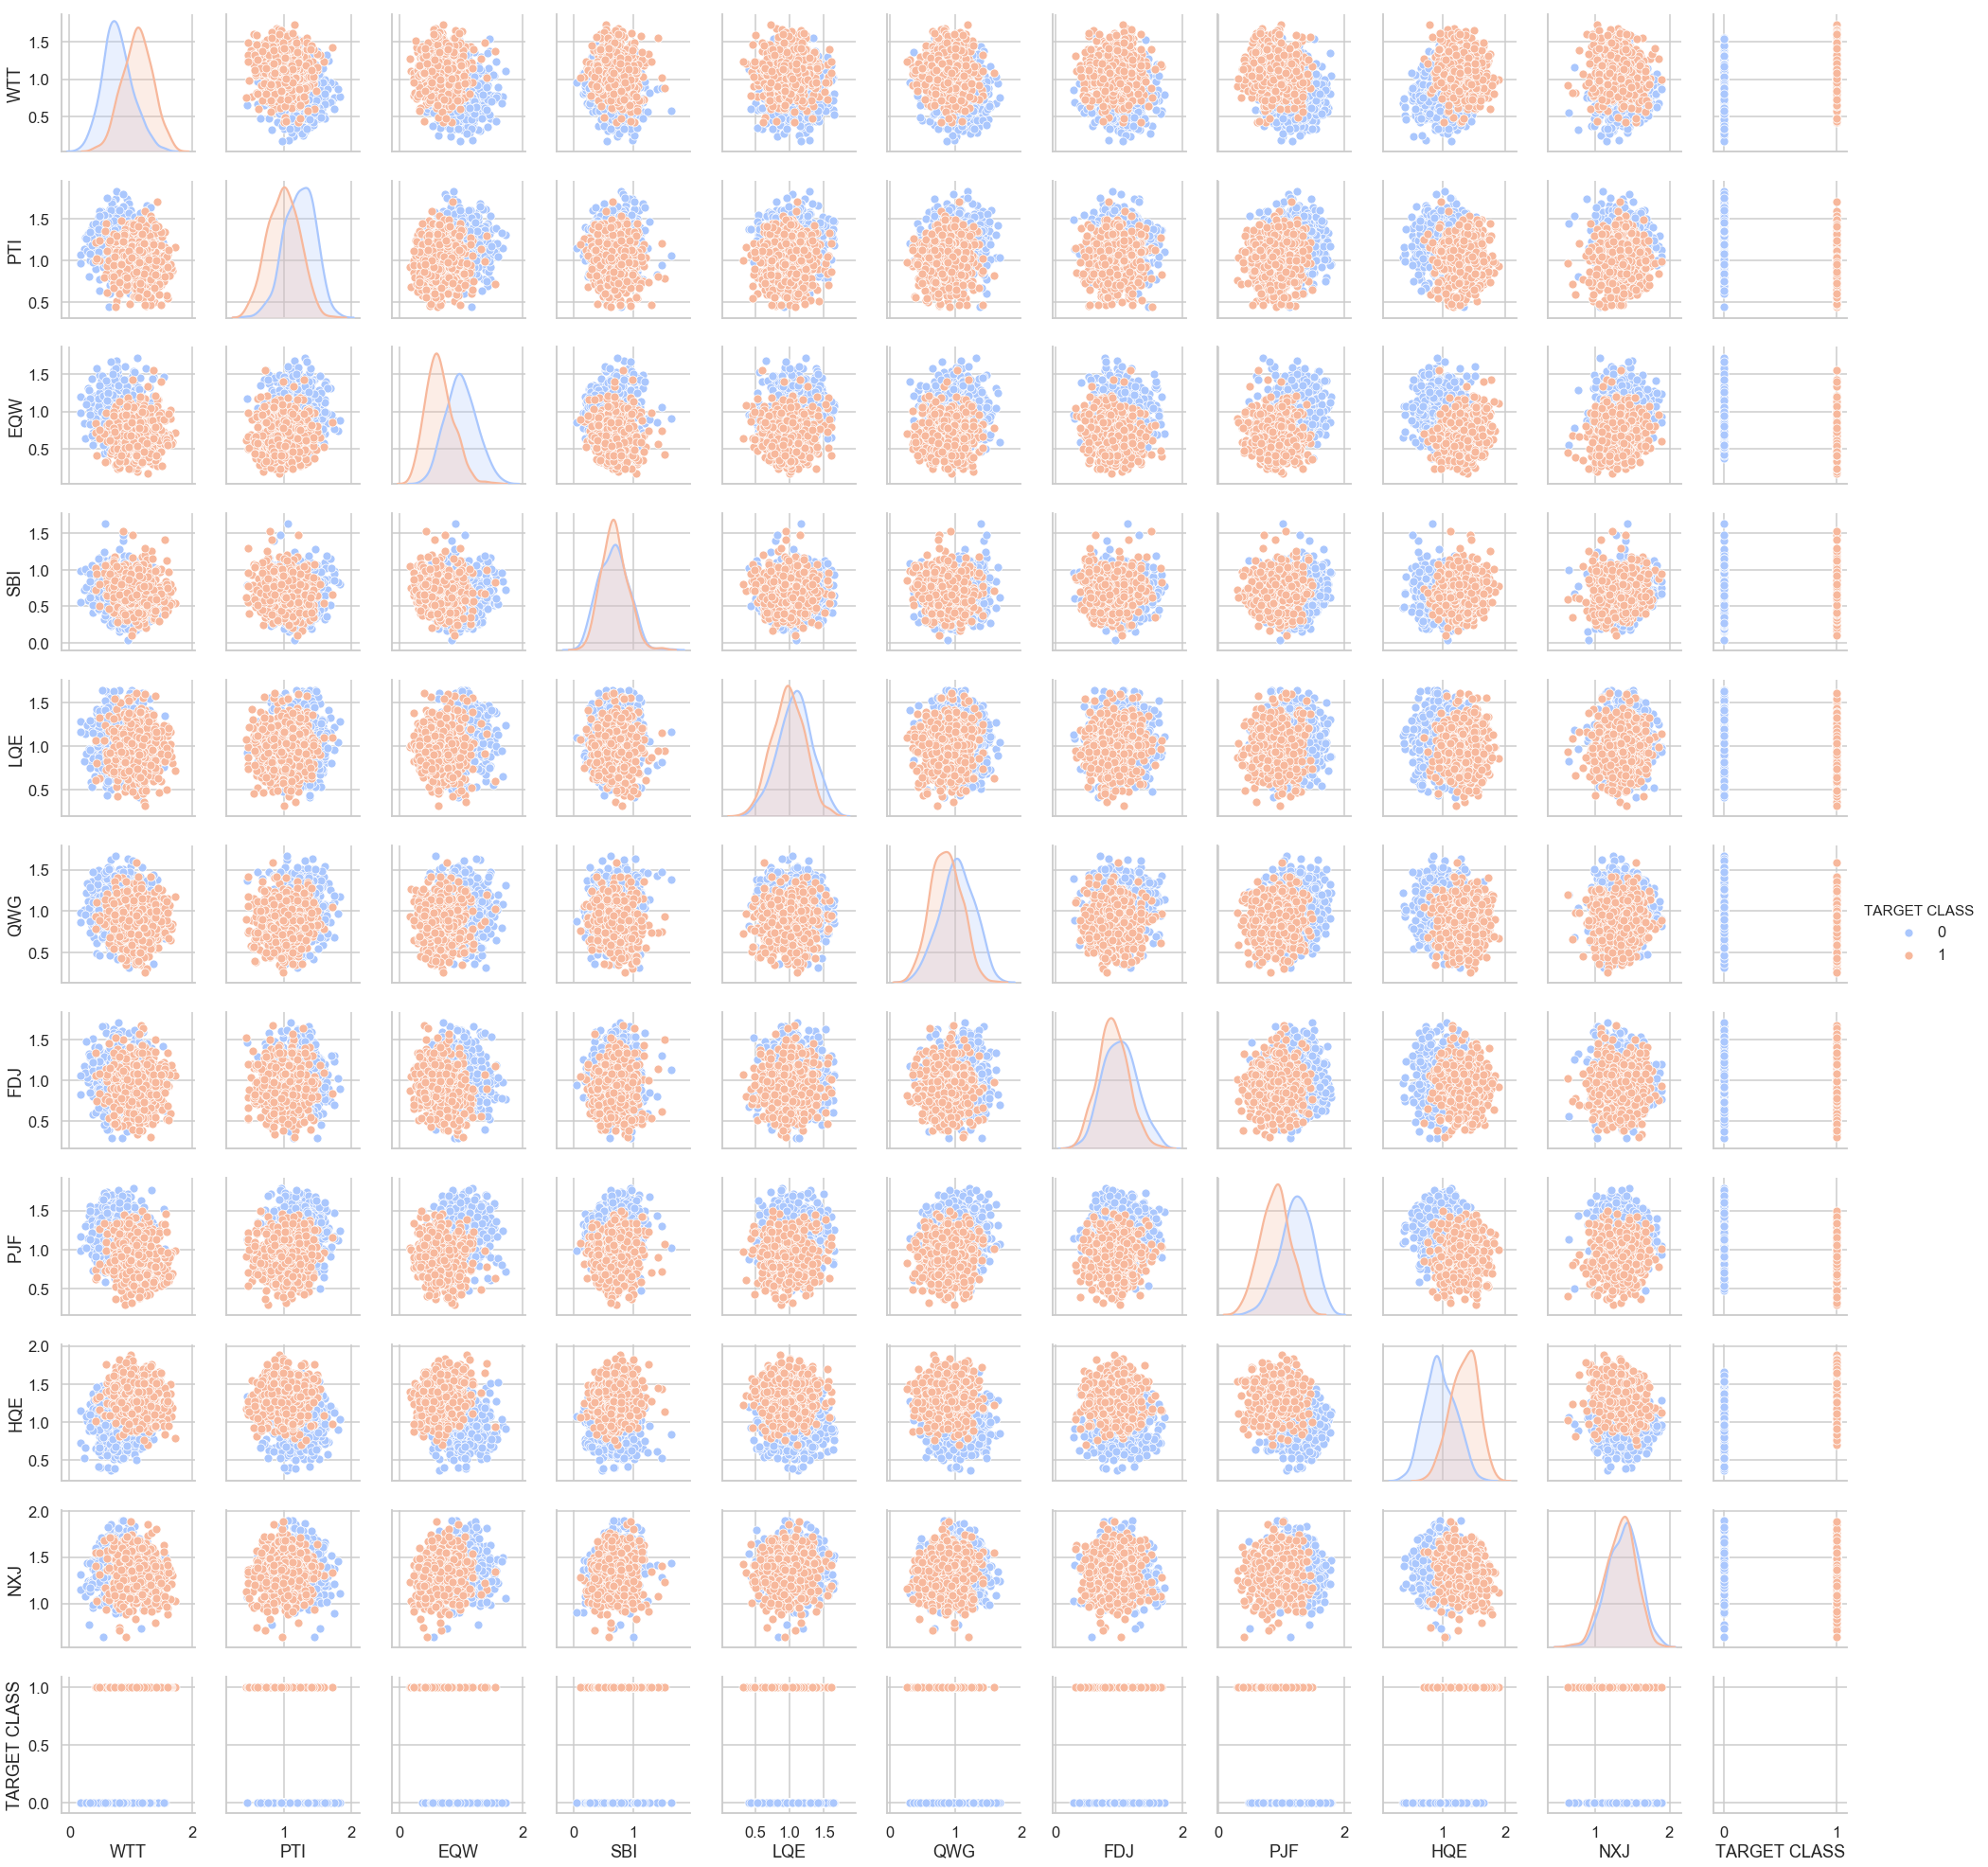

In [17]:
sns.pairplot(df, hue='TARGET CLASS', palette='coolwarm')

<a id='model'></a>
## Model building

### standardize the variables
A KNN model predicts the class of a test data point by identifying the data points that are nearest to it, the scale of the varaibles matter a lot. Any variables that are on a large scale will have much larger effect on the distance between data points. Therefore, standarizing is very important while building a KNN model.

In [13]:
# Standardizing the variables
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [19]:
# Fitting scaler to all the features of df minus target_class variable
scaler.fit(df.drop('target_class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
# Using scaler object to do a transformation
scaled_variables = scaler.transform(df.drop('target_class', axis=1))

In [22]:
# Creating a dataframe that has scaled variables; defining column names by grabbing the all the column names from df 
# except the last one which is target_class
df_scaled = pd.DataFrame(scaled_variables, columns=df.columns[:-1])

In [23]:
df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


**Now, our data is ready to build KNN model**

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# X are all the standardized features which we have ready in df_scaled; y is target_class variable from df 
X = df_scaled
y = df['target_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=101)

# Using KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# specifying the value of k
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
# training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [29]:
# Deriving predicted values by inputting X_test in the model
pred = knn.predict(X_test)

<a id='predictions'></a>
## Predictions and Model Evaluation

Let's evaluate our KNN model!

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
# Evaluating the model performance
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



**This is a very good model**

<a id='elbow'></a>
## Elbow method - Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [51]:
# Using Elbow method to choose correct k value

error_rate = []

for i in range(1,60):
    #
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model to training data
    knn.fit(X_train, y_train)
    # making the predictions using X_test data
    pred_i = knn.predict(X_test)
    # error_rate is avg of where the predictions do not match y_test
    error_rate.append(np.mean(pred_i != y_test))

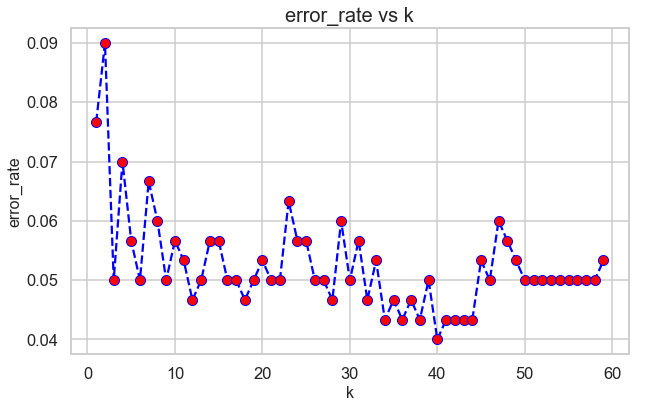

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60), error_rate, color='blue', linestyle='--', marker='o', 
        markerfacecolor='red', markersize=10)
plt.title('error_rate vs k', fontsize=20)
plt.xlabel('k', fontsize=16)
plt.ylabel('error_rate',fontsize=16);

## Retrain with new K Value

**Retraining model with the best K value of 35 and re-doing the classification report and the confusion matrix.**

In [54]:
knn = KNeighborsClassifier(n_neighbors=35)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

In [55]:
print('WITH K=35')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=35


[[152   7]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.95      0.95      0.95       141

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



**We are able to increase precision and recall by choosing k=35**

In [60]:
data={'y_test': y_test, 'predicted':pred}

In [64]:
# creating a dataframe of y_test and pred variables
data1 = pd.DataFrame(data)

In [65]:
# Investigating where the predictions do not match the actual target_class values
data1[data1['y_test'] != data1['predicted']]

,y_test,predicted
269,1,0
420,0,1
116,0,1
355,1,0
614,0,1
479,1,0
6,0,1
613,0,1
500,1,0
360,0,1
